In [38]:
import torch
import matplotlib.pyplot as plt

In [39]:
def get_bernoulli_sample_sum(probs, n):
  return int(sum(torch.distributions.Bernoulli(probs=probs).expand(
      batch_shape = torch.Size([n])).sample()))

In [40]:
def get_points(mean_vector, sd_vector, n):
  covariance_matrix = torch.diag(torch.square(sd_vector))
  return torch.distributions.multivariate_normal.MultivariateNormal(mean_vector, covariance_matrix=covariance_matrix).expand(batch_shape = torch.Size([n])).sample()

In [41]:
def mouse(M,sds, prop):
  head_N = get_bernoulli_sample_sum(prop, M)
  ears_N = M - head_N
  ear1_N = get_bernoulli_sample_sum(0.5, ears_N)
  head_points = get_points(torch.FloatTensor([0, 0]), torch.FloatTensor([sds[0], sds[0]]), head_N)
  ear1_points = get_points(torch.FloatTensor([-1, 1]), torch.FloatTensor([sds[1], sds[1]]), ear1_N)
  ear2_points = get_points(torch.FloatTensor([1, 1]), torch.FloatTensor([sds[1], sds[1]]), ears_N - ear1_N)
  return torch.cat([head_points, ear1_points, ear2_points])

sampled_points = mouse(10000, [0.4, 0.2], 0.8)
sampled_points

tensor([[-0.7559, -0.8223],
        [-0.2260, -0.4030],
        [-0.1107, -0.0792],
        ...,
        [ 1.0827,  1.0936],
        [ 1.3145,  0.9981],
        [ 1.1519,  1.0200]])

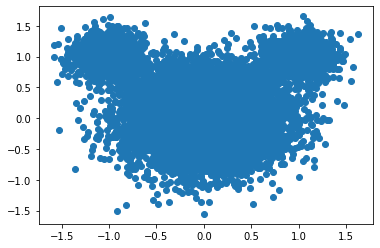

In [42]:
plt.scatter(sampled_points[:,0], sampled_points[:, 1])